<a href="https://colab.research.google.com/github/isaacbull/Data-Science-zikspot/blob/main/advanced_python_and_data_science_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook showcases a blend of programming techniques for data tasks:

* Custom Data Structures (Rectangle): Defines a Rectangle class, utilizing Python's property method to create setter methods. This allows for controlled attribute assignment and data validation, useful for applications requiring robust data integrity.
* Singleton Pattern (Logger): Ensures a single instance of a class exists, often for managing shared resources or state, critical in larger applications.
* Parallel Computing (Dask): Handles large datasets efficiently using parallel computations. Ideal for processing data exceeding memory capacity, enabling mean calculations and aggregations on large arrays and dataframes.
* Residual Analysis: Evaluates model quality by examining errors (residuals) using visualizations (scatter plots, histograms) and statistical tests (Shapiro-Wilk, D'Agostino's K^2, Q-Q plots) for testing normality. This aids in understanding model performance and identifying areas for improvement.

## Tools and Applications
* Python: The foundation language for the code.
* Jupyter Notebook: Interactive environment for experimentation and analysis.
Dask: Enables parallel computations on large datasets.
* scikit-learn: Provides tools for machine learning, including regression.
matplotlib, seaborn: Create visualizations for data exploration and model insights.
* scipy.stats: Statistical analysis tools, including normality tests.
* NumPy: Supports numerical operations with arrays and matrices.
* Pandas: Data manipulation and analysis, often paired with Dask for large datasets.
This combination of tools empowers data professionals to perform a variety of data-related tasks, from custom data structures to machine learning and model evaluation. I've highlighted the property method's use within the Rectangle class for clarity. I hope this concise summary is helpful!

In [1]:
## using property decorator on python

class Rectangle:
    def __init__(self, width, height):
        self._width = width
        self._height = height

    @property
    def width(self):
        return self._width

    @width.setter
    def width(self, value):
        if value <= 0:
            raise ValueError("Width must be positive")
        self._width = value

    @property
    def height(self):
        return self._height

    @height.setter
    def height(self, value):
        if value <= 0:
            raise ValueError("Height must be positive")
        self._height = value

rect = Rectangle(10, 5)
rect.width = 15
print(rect.width)  # Output: 15


15


In [ ]:
#enforcing single classes or enforcing best practices..


class Singleton(type):
    """ok"""
    _instances = {}
    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            cls._instances[cls] = super(Singleton, cls).__call__(*args, **kwargs)
        return cls._instances[cls]

class Logger(metaclass=Singleton):
    pass

logger1 = Logger()
logger2 = Logger()
print(logger1 is logger2)  # Output: True


In [1]:
# dask for parallel computing and distributed computing


import dask.array as da

x = da.random.random((10000, 10000), chunks=(1000, 1000))
result = x.mean().compute()


In [1]:
# prompt: do memoization for a function

import functools

def memoize(func):
    cache = {}
    @functools.wraps(func)
    def wrapper(*args):
        if args not in cache:
            cache[args] = func(*args)
        return cache[args]
    return wrapper

# Example usage with a simple function
@memoize
def fibonacci(n):
  if n <= 1:
    return n
  return fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(10)) #This will now use the memoized values.

55


In [6]:

#print(result)
print(x.shape)
print(result.shape)

(10000, 10000)
()


In [7]:
print(x[:10,:10].compute())

[[0.92444077 0.24056019 0.25139895 0.23491369 0.53556229 0.01400559
  0.1501153  0.95955668 0.66579194 0.88929539]
 [0.59958015 0.2165804  0.67638256 0.99502612 0.55953329 0.17873921
  0.53966885 0.42316883 0.81879279 0.32845846]
 [0.37477742 0.01902914 0.44713822 0.87520299 0.08568312 0.79249667
  0.11649496 0.18613345 0.38788552 0.48191272]
 [0.48975128 0.89285367 0.93364356 0.25157913 0.45845461 0.72219923
  0.29815922 0.10411474 0.36168317 0.51966798]
 [0.37421169 0.46590673 0.99566936 0.38498617 0.07877869 0.22268307
  0.35880293 0.27046963 0.85441127 0.26234924]
 [0.96561639 0.48803732 0.13177156 0.91978334 0.65589549 0.70870513
  0.76842664 0.74855604 0.43760231 0.78991631]
 [0.48978584 0.37247875 0.1712306  0.14706889 0.21278445 0.07221426
  0.51875501 0.67103943 0.77790591 0.11839999]
 [0.03500286 0.43663321 0.24258127 0.94036878 0.45041146 0.10730153
  0.00992729 0.17922549 0.48704965 0.6077029 ]
 [0.92726269 0.80439251 0.26259297 0.96226256 0.35500293 0.24022897
  0.9932656 

In [8]:
import dask.dataframe as dd

#df = dd.read_csv('large_dataset.csv')
#result = df.groupby('category').sum().compute()


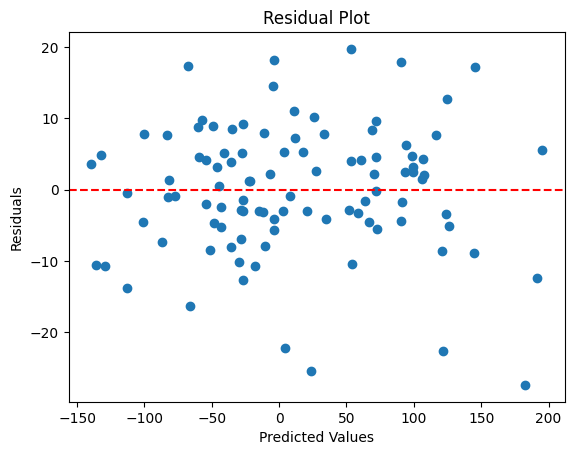

In [9]:
## residual plots for analyzing regression fit and residuals, also used for outlier detection

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


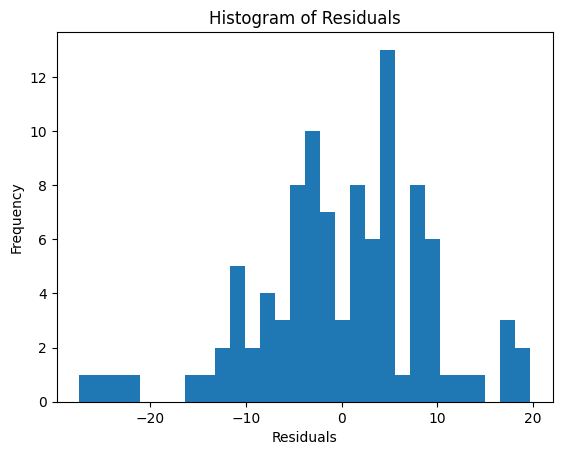

In [10]:
# prompt: plot histogram distribution of residuals

import matplotlib.pyplot as plt

# Plot the histogram of the residuals
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Shapiro-Wilk Test: ShapiroResult(statistic=0.9745428120482162, pvalue=0.049692207462868794)
D'Agostino's K^2 Test: NormaltestResult(statistic=6.369699540073793, pvalue=0.04138446252026743)


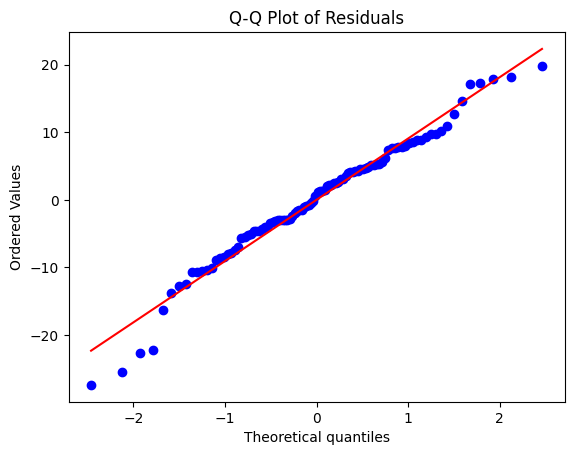

In [11]:
## shapiro, dagostino test and qq plot for testing normalty. using residuals data as input.

import matplotlib.pyplot as plt
import scipy.stats as stats

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test:", shapiro_test)

# Perform D'Agostino's K^2 test for normality
k2_test = stats.normaltest(residuals)
print("D'Agostino's K^2 Test:", k2_test)

# Create a Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()
